# Coursera Applied Data Science capstone - Matt Pirecki

In [1]:
# Importing the packages needed for this final presentation

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
# Read in the data set and explore some of the fields
df = pd.read_csv("Data-Collisions.csv")
df.head(10)

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N
3,1,-122.338485,47.618534,7,83300,83300,3282542,Matched,Intersection,29510.0,...,Wet,Daylight,NaN,8344002.0,NaN,10,Entering at angle,0,0,N
4,1,-122.356273,47.571375,16,2771,2771,1211870,Unmatched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,3137016.0,NaN,14,From same direction - both going straight - on...,0,0,N
5,1,-122.323966,47.606374,17,32800,32800,2128498,Matched,Block,NaN,...,Wet,Dark - No Street Lights,NaN,5356027.0,NaN,32,One parked--one moving,0,0,N
6,1,-122.330730,47.615450,35,113300,113300,3346338,Matched,Intersection,29865.0,...,Wet,Unknown,NaN,10317016.0,NaN,28,From opposite direction - one left turn - one ...,0,0,N
7,1,-122.324749,47.605555,39,40800,40800,2108924,Matched,Intersection,29959.0,...,Wet,Dark - Street Lights On,NaN,5309055.0,NaN,28,From opposite direction - one left turn - one ...,0,0,N
8,1,-122.318741,47.676567,44,320910,322410,E925173,Matched,Block,NaN,...,Wet,Daylight,NaN,NaN,NaN,32,One parked--one moving,0,0,Y
9,2,-122.337348,47.520472,53,56100,56100,2619853,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6256005.0,Y,50,Fixed object,0,0,N


In [3]:
df.describe()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,65070.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,1.149360e+05,194673.000000,1.946730e+05
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,37558.450576,1.298901,2.444427,0.037139,0.028391,1.920780,13.867768,7.972521e+06,269.401114,9.782452e+03
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,51745.990273,0.457778,1.345929,0.198150,0.167413,0.631047,6.868755,2.553533e+06,3315.776055,7.226926e+04
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,23807.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.007024e+06,0.000000,0.000000e+00
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,28667.000000,1.000000,2.000000,0.000000,0.000000,2.000000,11.000000,6.040015e+06,0.000000,0.000000e+00
50%,1.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,29973.000000,1.000000,2.000000,0.000000,0.000000,2.000000,13.000000,8.023022e+06,0.000000,0.000000e+00
75%,2.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,33973.000000,2.000000,3.000000,0.000000,0.000000,2.000000,14.000000,1.015501e+07,0.000000,0.000000e+00
max,2.000000,-122.238949,47.734142,219547.000000,331454.000000,332954.000000,757580.000000,2.000000,81.000000,6.000000,2.000000,12.000000,69.000000,1.307202e+07,525241.000000,5.239700e+06


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEVERITYCODE    194673 non-null  int64  
 1   X               189339 non-null  float64
 2   Y               189339 non-null  float64
 3   OBJECTID        194673 non-null  int64  
 4   INCKEY          194673 non-null  int64  
 5   COLDETKEY       194673 non-null  int64  
 6   REPORTNO        194673 non-null  object 
 7   STATUS          194673 non-null  object 
 8   ADDRTYPE        192747 non-null  object 
 9   INTKEY          65070 non-null   float64
 10  LOCATION        191996 non-null  object 
 11  EXCEPTRSNCODE   84811 non-null   object 
 12  EXCEPTRSNDESC   5638 non-null    object 
 13  SEVERITYCODE.1  194673 non-null  int64  
 14  SEVERITYDESC    194673 non-null  object 
 15  COLLISIONTYPE   189769 non-null  object 
 16  PERSONCOUNT     194673 non-null  int64  
 17  PEDCOUNT  

In [5]:
df.count()

SEVERITYCODE      194673
X                 189339
Y                 189339
OBJECTID          194673
INCKEY            194673
COLDETKEY         194673
REPORTNO          194673
STATUS            194673
ADDRTYPE          192747
INTKEY             65070
LOCATION          191996
EXCEPTRSNCODE      84811
EXCEPTRSNDESC       5638
SEVERITYCODE.1    194673
SEVERITYDESC      194673
COLLISIONTYPE     189769
PERSONCOUNT       194673
PEDCOUNT          194673
PEDCYLCOUNT       194673
VEHCOUNT          194673
INCDATE           194673
INCDTTM           194673
JUNCTIONTYPE      188344
SDOT_COLCODE      194673
SDOT_COLDESC      194673
INATTENTIONIND     29805
UNDERINFL         189789
WEATHER           189592
ROADCOND          189661
LIGHTCOND         189503
PEDROWNOTGRNT       4667
SDOTCOLNUM        114936
SPEEDING            9333
ST_COLCODE        194655
ST_COLDESC        189769
SEGLANEKEY        194673
CROSSWALKKEY      194673
HITPARKEDCAR      194673
dtype: int64

In [6]:
# Here I am seeing there are two codes and their respective counts.

df.groupby(["SEVERITYCODE", "SEVERITYDESC"]).size()

SEVERITYCODE  SEVERITYDESC                  
1             Property Damage Only Collision    136485
2             Injury Collision                   58188
dtype: int64

In [7]:
df.groupby(["SEVERITYCODE", "SEVERITYDESC"]).size() / 194673 * 100

SEVERITYCODE  SEVERITYDESC                  
1             Property Damage Only Collision    70.109877
2             Injury Collision                  29.890123
dtype: float64

In [8]:
severeAccidents = df[(df['SEVERITYCODE']==2)]
minorAccidents = df[(df['SEVERITYCODE']==1)]

In [9]:
# Here exploring the collision types for the respective datasets. I will focus on Rear Ended and Angles for severe.

severeAccidents['COLLISIONTYPE'].value_counts() / 58188 * 100

Rear Ended    25.213102
Angles        23.413762
Other         10.503884
Pedestrian    10.201416
Left Turn      9.299168
Cycles         8.152884
Parked Car     4.574826
Sideswipe      4.306730
Head On        1.498591
Right Turn     1.046608
Name: COLLISIONTYPE, dtype: float64

In [10]:
minorAccidents['COLLISIONTYPE'].value_counts() / 136485 * 100

Parked Car    33.208778
Angles        15.422940
Rear Ended    14.227937
Other         12.888596
Sideswipe     11.798366
Left Turn      6.075393
Right Turn     1.719603
Head On        0.844049
Pedestrian     0.492362
Cycles         0.491629
Name: COLLISIONTYPE, dtype: float64

In [11]:
# Some key fields that have been identified from the course text. For deeper evaluation:

# INATTENTIONIND - Whether or not collision was due to inattention.(Y/N) 
# UNDERINFL - Whether or not a driver involved was under the influence of drugs or alcohol.
# WEATHER - A description of the weather conditions during the time of the collision. 
# ROADCOND  - The condition of the road during the collision.
# LIGHTCOND  - The light conditions during the collision.
# SPEEDING - Whether or not speeding was a factor in the collision. (Y/N)

In [29]:
conditions = df[["SEVERITYCODE","SEVERITYDESC","COLLISIONTYPE","INATTENTIONIND", "UNDERINFL","WEATHER","ROADCOND","LIGHTCOND","SPEEDING"]]
conditions.head(10)

,SEVERITYCODE,SEVERITYDESC,COLLISIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
0,2,Injury Collision,Angles,NaN,N,Overcast,Wet,Daylight,NaN
1,1,Property Damage Only Collision,Sideswipe,NaN,0,Raining,Wet,Dark - Street Lights On,NaN
2,2,Injury Collision,Angles,NaN,0,Raining,Wet,Daylight,NaN
3,1,Property Damage Only Collision,Angles,NaN,0,Raining,Wet,Daylight,NaN
4,1,Property Damage Only Collision,Rear Ended,NaN,0,Raining,Wet,Dark - Street Lights On,NaN
5,1,Property Damage Only Collision,Parked Car,NaN,0,Raining,Wet,Dark - No Street Lights,NaN
6,1,Property Damage Only Collision,Left Turn,NaN,N,Overcast,Wet,Unknown,NaN
7,1,Property Damage Only Collision,Left Turn,NaN,0,Raining,Wet,Dark - Street Lights On,NaN
8,1,Property Damage Only Collision,Parked Car,NaN,N,Raining,Wet,Daylight,NaN
9,2,Injury Collision,Other,NaN,0,Raining,Wet,Dark - Street Lights On,Y


In [30]:
# Time to plot some of the conditions for some at a glance help when making the next observations.

In [31]:
import seaborn as sns

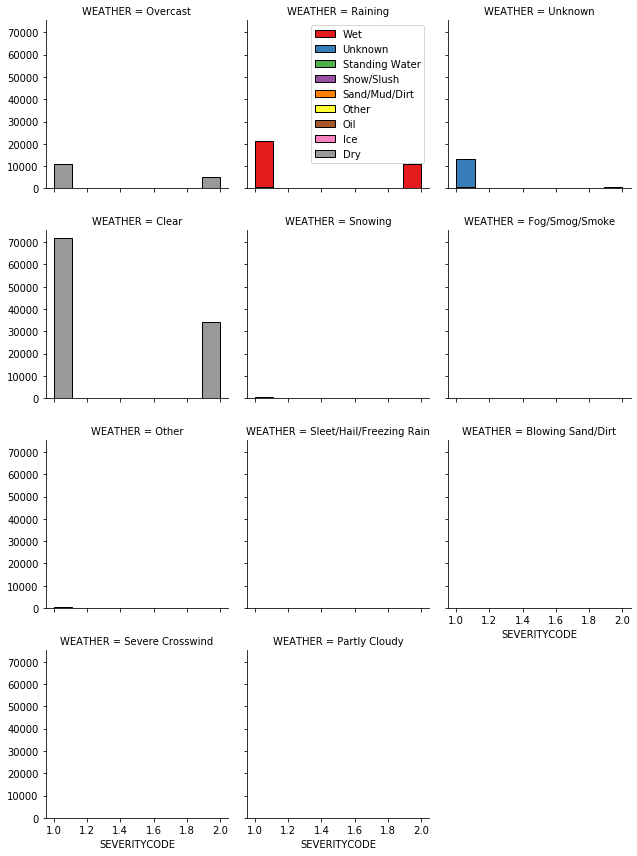

In [32]:
bins = np.linspace(conditions.SEVERITYCODE.min(), conditions.SEVERITYCODE.max(), 10)
g = sns.FacetGrid(conditions, col="WEATHER", hue="ROADCOND", palette="Set1", col_wrap=3)
g.map(plt.hist, 'SEVERITYCODE', bins=bins, ec="k")

g.axes[1].legend()
plt.show()

In [45]:
conditions.head(1)

,SEVERITYCODE,SEVERITYDESC,COLLISIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
0,2,Injury Collision,Angles,NaN,N,Overcast,Wet,Daylight,NaN


In [60]:
df.SEVERITYDESC.unique()

array(['Injury Collision', 'Property Damage Only Collision'], dtype=object)

In [59]:
df.COLLISIONTYPE.unique()

array(['Angles', 'Sideswipe', 'Rear Ended', 'Parked Car', 'Left Turn',
       'Other', 'Pedestrian', 'Cycles', 'Right Turn', 'Head On', nan],
      dtype=object)

In [58]:
df.UNDERINFL.unique()

array(['N', '0', 'Y', '1', nan], dtype=object)

In [57]:
df.WEATHER.unique()

array(['Overcast', 'Raining', 'Unknown', 'Clear', 'Snowing',
       'Fog/Smog/Smoke', 'Other', 'Sleet/Hail/Freezing Rain',
       'Blowing Sand/Dirt', 'Severe Crosswind', nan, 'Partly Cloudy'],
      dtype=object)

In [56]:
df.LIGHTCOND.unique()

array(['Daylight', 'Dark - Street Lights On', 'Dark - No Street Lights',
       'Unknown', 'Dusk', 'Other', 'Dawn', 'Dark - Unknown Lighting',
       'Dark - Street Lights Off', nan], dtype=object)

In [52]:
df.ROADCOND.unique()

array(['Wet', 'Unknown', 'Standing Water', 'Snow/Slush', 'Sand/Mud/Dirt',
       'Other', 'Oil', 'Ice', 'Dry', nan], dtype=object)

In [55]:
df.SPEEDING.unique()

array([nan, 'Y'], dtype=object)

In [61]:
# One hot encoding to normalize the data to set for a tree model

In [62]:
from sklearn.preprocessing import OneHotEncoder 
from sklearn.compose import ColumnTransformer 

In [63]:
columnTransformer = ColumnTransformer([('encoder', 
                                        OneHotEncoder(), 
                                        [0])], 
                                      remainder='passthrough') 
  
data = np.array(columnTransformer.fit_transform(df), dtype = np.str) 

In [72]:
df['ROADCOND'].value_counts().to_frame()

,ROADCOND
Dry,124510
Wet,47474
Unknown,15078
Ice,1209
Snow/Slush,1004
Other,132
Standing Water,115
Sand/Mud/Dirt,75
Oil,64


In [73]:
df['WEATHER'].value_counts().to_frame()

,WEATHER
Clear,111135
Raining,33145
Overcast,27714
Unknown,15091
Snowing,907
Other,832
Fog/Smog/Smoke,569
Sleet/Hail/Freezing Rain,113
Blowing Sand/Dirt,56
Severe Crosswind,25


In [74]:
df['LIGHTCOND'].value_counts().to_frame()

,LIGHTCOND
Daylight,116137
Dark - Street Lights On,48507
Unknown,13473
Dusk,5902
Dawn,2502
Dark - No Street Lights,1537
Dark - Street Lights Off,1199
Other,235
Dark - Unknown Lighting,11
